# Generation of random Voronoi Diagrams

In [1]:
image_number= int(input("write the number of images: " ))

explanation= "You have to fill the needed data for each of {} images".format(image_number)
print(explanation)
stored= []

from scipy.spatial import Voronoi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


write the number of images: 2
You have to fill the needed data for each of 2 images


In [2]:
for i in range(image_number):


    def vorarr(regions, vertices, width, height, dpi=100):
        fig = plt.Figure(figsize=(width/dpi, height/dpi), dpi=dpi)
        canvas = FigureCanvas(fig)
        ax = fig.add_axes([0,0,1,1])

    # colorize
        for region in regions:
            polygon = vertices[region]
            ax.fill(*zip(*polygon), alpha=0.4)

        ax.plot(points[:,0], points[:,1], 'ko')
        ax.set_xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
        ax.set_ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

        canvas.draw()
        return np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(height, width, 3)

#######


# get random points
    point_number= int(input("write the number of points for image number {}: ".format(i+1) ))
    n_width=  int(input("write the number width for image number {}: ".format(i+1) ))
    n_height= int(input("write the number height for image number {}: ".format(i+1) ))
    n_seeds= int(input("write the number seeds for image number {}: ".format(i+1) ))
    np.random.seed()
    points = np.random.rand(point_number, 2)






# compute Voronoi tesselation
    vor = Voronoi(points)


    def voronoi_finite_polygons_2d(vor, radius=None):


        if vor.points.shape[1] != 2:
            raise ValueError("Requires 2D input")

        new_regions = []
        new_vertices = vor.vertices.tolist()

        center = vor.points.mean(axis=0)
        if radius is None:
            radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
        all_ridges = {}
        for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
            all_ridges.setdefault(p1, []).append((p2, v1, v2))
            all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
        for p1, region in enumerate(vor.point_region):
            vertices = vor.regions[region]

            if all(v >= 0 for v in vertices):
                # finite region
                new_regions.append(vertices)
                continue

        # reconstruct a non-finite region
            ridges = all_ridges[p1]
            new_region = [v for v in vertices if v >= 0]

            for p2, v1, v2 in ridges:
                if v2 < 0:
                    v1, v2 = v2, v1
                    if v1 >= 0:
                # finite ridge: already in the region
                        continue

            # Compute the missing endpoint of an infinite ridge

                t = vor.points[p2] - vor.points[p1] # tangent
                t /= np.linalg.norm(t)
                n = np.array([-t[1], t[0]])  # normal

                midpoint = vor.points[[p1, p2]].mean(axis=0)
                direction = np.sign(np.dot(midpoint - center, n)) * n
                far_point = vor.vertices[v2] + direction * radius

                new_region.append(len(new_vertices))
                new_vertices.append(far_point.tolist())

        # sort region counterclockwise
            vs = np.asarray([new_vertices[v] for v in new_region])
            c = vs.mean(axis=0)
            angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
            new_region = np.array(new_region)[np.argsort(angles)]

        # finish
            new_regions.append(new_region.tolist())

        return new_regions, np.asarray(new_vertices)


    regions, vertices = voronoi_finite_polygons_2d(vor)

# convert plotting data to numpy array
    arr = vorarr(regions, vertices, width= n_width, height= n_height)
    stored.append(arr)
# stored is a list whose elements are the numpy arraies for each image








write the number of points for image number 1: 10
write the number width for image number 1: 500
write the number height for image number 1: 500
write the number seeds for image number 1: 10
write the number of points for image number 2: 20
write the number width for image number 2: 300
write the number height for image number 2: 300
write the number seeds for image number 2: 10


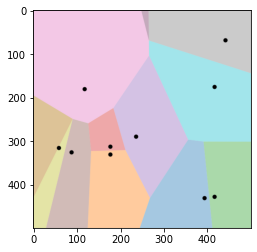

In [3]:
# yoy can check the below comands

# print(len(stored))
# print(type(stored[0]))

# plot the first image
plt.imshow(stored[0])
